linear-regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.


In [2]:
sns.set_theme(style="darkgrid", palette="muted")

In [3]:
def simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq):
    """
    Simulate a random dataset using a noisy
    linear process.
    N: Number of data points to simulate
    beta_0: Intercept
    beta_1: Slope of univariate predictor, X
    """
    # Create a pandas DataFrame with column 'x' containing
    # N uniformly sampled values between 0.0 and 1.0
    df = pd.DataFrame(

        {
            "x": np.random.choice(np.arange(N) / 100.0, N, replace=False)
            # "x":
            # np.random.RandomState(42).choice(
            #     map(
            #         lambda x: float(x)/100.0,
            #         np.arange(N)
            #     ), N, replace=False
            # )
        }
    )

    # Use a linear model (y ~ beta_0 + beta_1*x + epsilon) to
    # generate a column 'y' of responses based on 'x'
    eps_mean = 0.0
    df["y"] = beta_0 + beta_1*df["x"] + np.random.RandomState(42).normal(
        eps_mean, eps_sigma_sq, N
    )
    return df

In [4]:
def glm_mcmc_inference(df, iterations=5000):
    """
    Calculates the Markov Chain Monte Carlo trace of
    a Generalised Linear Model Bayesian linear regression 
    model on supplied data.
    df: DataFrame containing the data
    iterations: Number of iterations to carry out MCMC for
    """
    # Use PyMC3 to construct a model context
    basic_model = pm.Model()
    with basic_model:
        # Create the glm using the Patsy model syntax
        # We use a Normal distribution for the likelihood
        # pm.glm.plot_posterior_predictive("y ~ x", df, family=pm.glm.families.Normal())
        pm.GLM.from_formula("y ~ x", df, family=pm.glm.families.Normal())

        # Use Maximum A Posteriori (MAP) optimisation 
        # as initial value for MCMC
        start = pm.find_MAP()

        # Use the No-U-Turn Sampler
        step = pm.NUTS()

        # Calculate the trace
        trace = pm.sample(
            iterations, step, start, 
            random_seed=42, progressbar=True, return_inferencedata=False
        )
    return trace

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 3 seconds.
/tmp/ipykernel_40927/277022170.py:20: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace[500:])
Got error No model on context stack. trying to find log_likelihood in translation.
/home/hung/.local/share/virtualenvs/xAlgo-Dn1iA2SI/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


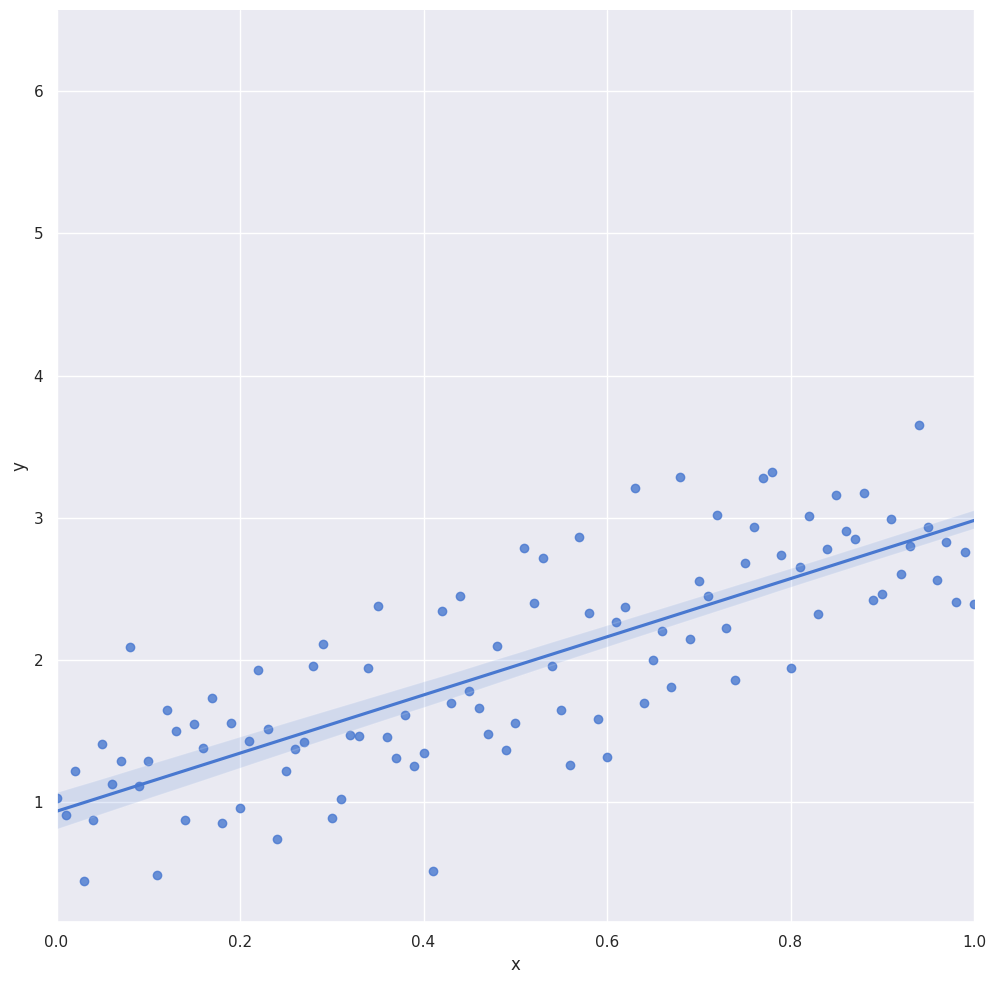

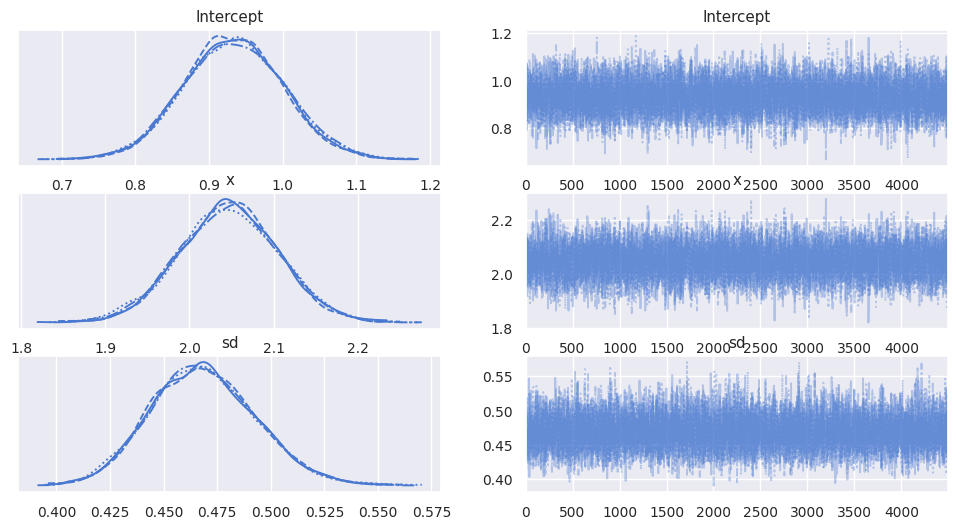

Got error No model on context stack. trying to find log_likelihood in translation.
/home/hung/.local/share/virtualenvs/xAlgo-Dn1iA2SI/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


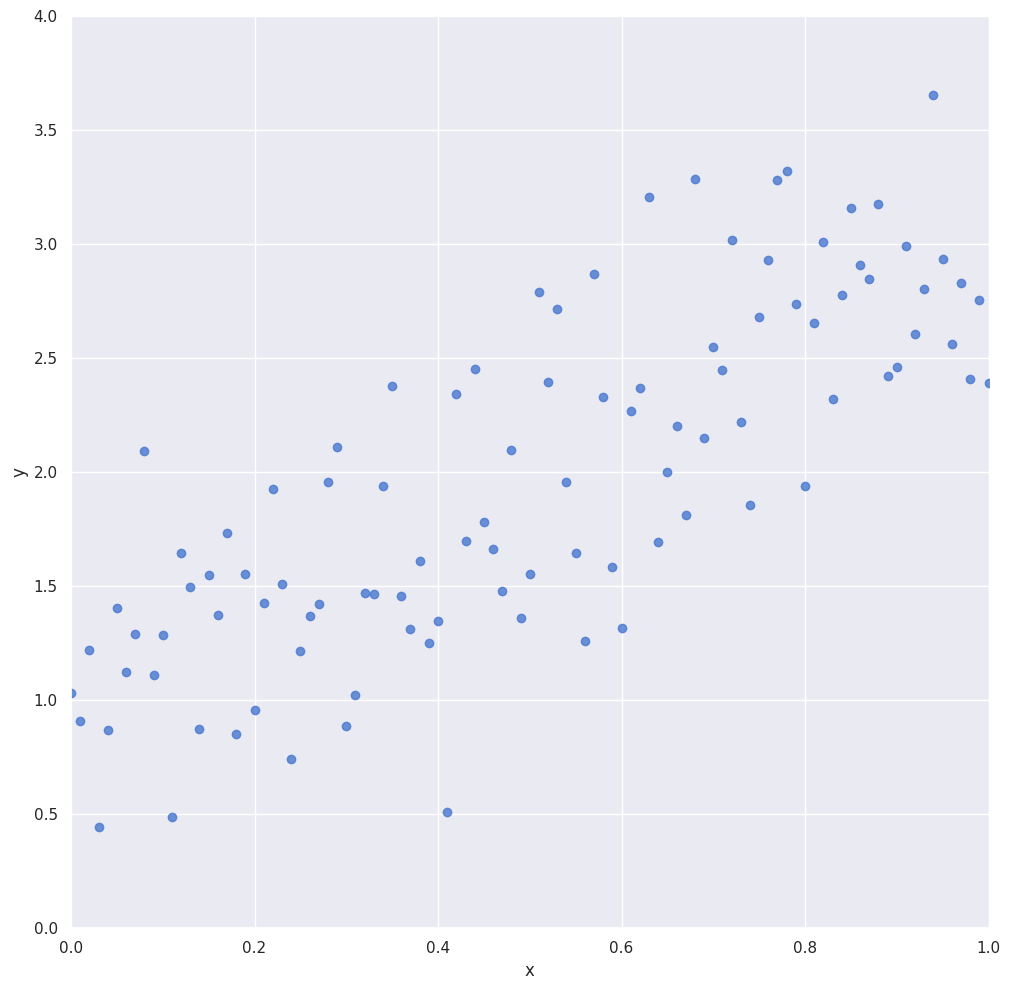

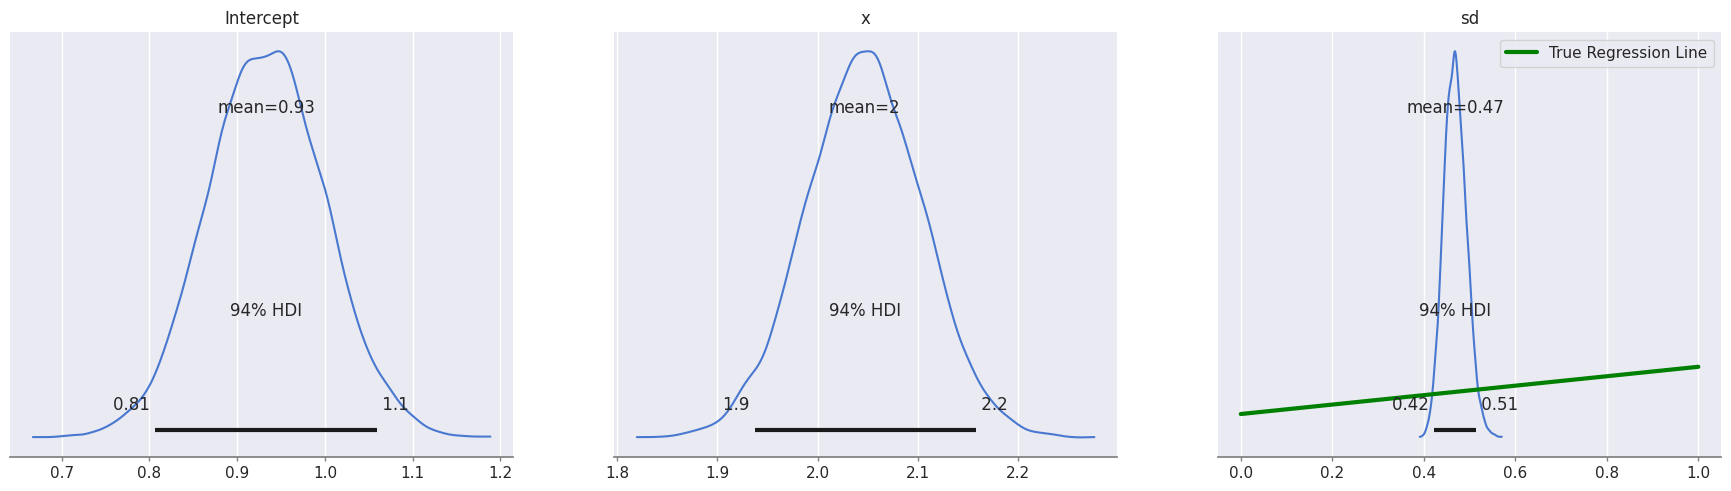

In [6]:
if __name__ == "__main__":
    # These are our "true" parameters
    beta_0 = 1.0  # Intercept
    beta_1 = 2.0  # Slope

    # Simulate 100 data points, with a variance of 0.5
    N = 200
    eps_sigma_sq = 0.5

    # Simulate the "linear" data using the above parameters
    df = simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq)

    # Plot the data, and a frequentist linear regression fit
    # using the seaborn package
    # sns.lmplot(x="x", y="y", data=df, size=10)
    sns.lmplot(x="x", y="y", data=df, height=10)
    plt.xlim(0.0, 1.0)
    
    trace = glm_mcmc_inference(df, iterations=5000)
    pm.traceplot(trace[500:])
    plt.show()

    # Plot a sample of posterior regression lines
    # sns.lmplot(x="x", y="y", data=df, size=10, fit_reg=False)

    sns.lmplot(x="x", y="y", data=df, height=10, fit_reg=False)
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 4.0)
    
    # pm.glm.plot_posterior_predictive(trace, samples=100)
    # pm.plot_posterior_predictive(trace, samples=100)
    az.plot_posterior(trace)    #, samples=100)

    x = np.linspace(0, 1, N)
    y = beta_0 + beta_1*x
    plt.plot(x, y, label="True Regression Line", lw=3., c="green")
    plt.legend(loc=0)
    plt.show()
    